# Experiment records
- Trained model name: resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5 (Fine-tuned on base model)
- Trained for: 22 epochs
- Augmentations used: Yes
- Accuracy achieved: approx. 95%
- Dataset used: MNIST

In [2]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2022-12-01 23:02:19.187208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 23:02:19.330941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 23:02:19.330967: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 23:02:20.013276: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
model = tf.keras.models.load_model('../../models/pre-trained_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5')
path = '../../data/test/*'

2022-12-01 23:02:23.558553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-01 23:02:23.558613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2022-12-01 23:02:23.559093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# To get the accuracy on test data and the number of misclassifications
result, accuracy = pred_using_h5_digit(model, path)
print("Accuracy on test dataset using .h5 model>>>>",accuracy)

1/1 [==============================] - 0s 38ms/step
Accuracy on test dataset using .h5 model>>>> 1.0


Text(0.5, 0.98, 'Inference')

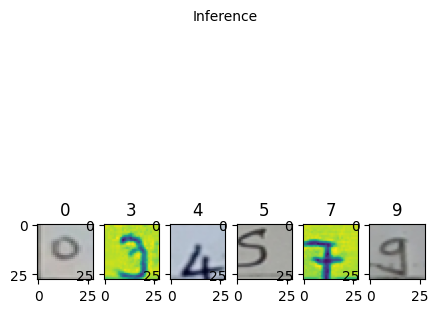

In [5]:
# To plot the images versus prediction (title of the image)
fig, axis = plt.subplots(nrows= 1, ncols=len(result), figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in result.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Inference', fontsize=10)

# .tflite model

In [6]:
# Trained model path and test data path
model = '../../models/tflite_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5_tflite.tflite'
path = '../../data/test/*'

In [7]:
result, accuracy = pred_using_tflite_model(model, path)
print("Accuracy on test dataset using .tflite model", accuracy)

Accuracy on test dataset using .tflite model 100.0


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Text(0.5, 0.98, 'Inference')

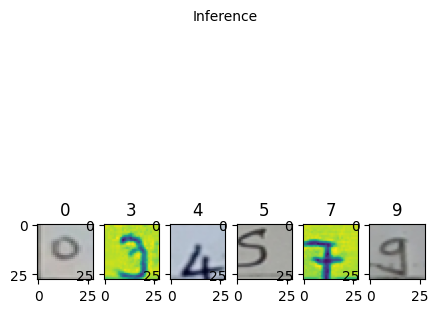

In [8]:
# To plot the images versus prediction (title of the image)
fig, axis = plt.subplots(nrows= 1, ncols=len(result), figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in result.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Inference', fontsize=10)